# 1. Reglas de asociacion

Como paso previo, y  puesto que el notebook de jupyter se ha instalado y ejecutado en windows, he instalado una implementación de apriori siguiente: https://pypi.python.org/pypi/apriori/1.0.0

por ese motivo, es posible que los métodos no sean identicos a los que se han utilizado en la práctica de clases, pero el resultado es similar. He tenido que investigar ya que la librería no está documentada. 

In [3]:
import csv
import apriori

groceries=[]
groceries_file=csv.reader(open("groceries.csv","rb"))
for row in groceries_file:
    groceries.append(row)



Utilizamos el algoritmo para detectar el soporte de la aparicion de los productos dentro de cada registro de compra y que superen el 0,05, es decir, de aquellos productos y combinaciones que al menos aparezcan en el 5% de las compras.

In [4]:
F, soporte = apriori.apriori(groceries, minSupport=0.05)
soporte

{frozenset({'pot plants'}): 0.01728520589730554,
 frozenset({'sausage', 'tropical fruit'}): 0.013929842399593289,
 frozenset({'other vegetables', 'pork'}): 0.021657346212506354,
 frozenset({'frankfurter'}): 0.058973055414336555,
 frozenset({'frankfurter', 'other vegetables'}): 0.016471784443314694,
 frozenset({'beef'}): 0.05246568378240976,
 frozenset({'pip fruit', 'whipped/sour cream'}): 0.009252669039145907,
 frozenset({'napkins', 'other vegetables'}): 0.01443823080833757,
 frozenset({'specialty cheese'}): 0.008540925266903915,
 frozenset({'napkins', 'whipped/sour cream'}): 0.007219115404168785,
 frozenset({'canned beer', 'pork'}): 0.0029486527707168276,
 frozenset({'fruit/vegetable juice', 'pip fruit'}): 0.009557702084392475,
 frozenset({'bottled beer', 'pip fruit'}): 0.005897305541433655,
 frozenset({'bottled beer', 'pork'}): 0.005185561769191663,
 frozenset({'liquor'}): 0.011082867310625319,
 frozenset({'coffee', 'domestic eggs'}): 0.00498220640569395,
 frozenset({'other vegetable

Una vez obtenido el soporte, buscamos aquellas combinaciones que dado A se cumple la compra de B en mas del 25% de las veces

In [21]:
H = apriori.generateRules(F, soporte, minConf=0.25)
H

frozenset(['yogurt']) --> frozenset(['whole milk']) conf: 0.401603498542
frozenset(['rolls/buns']) --> frozenset(['whole milk']) conf: 0.307904919845
frozenset(['other vegetables']) --> frozenset(['whole milk']) conf: 0.38675775092
frozenset(['whole milk']) --> frozenset(['other vegetables']) conf: 0.292877039395


[(frozenset({'yogurt'}), frozenset({'whole milk'}), 0.40160349854227406),
 (frozenset({'rolls/buns'}), frozenset({'whole milk'}), 0.30790491984521834),
 (frozenset({'other vegetables'}),
  frozenset({'whole milk'}),
  0.38675775091960063),
 (frozenset({'whole milk'}),
  frozenset({'other vegetables'}),
  0.2928770393951452)]

# 2 Implementación de una regresión “stepwise” con eliminación hacia atrás.

In [5]:
import pandas as pd

wine = pd.read_csv('winequality-white.csv', sep = ';')
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

# Separación de la variable objetivo y las explicativas
target = 'quality'
features = list(wine.columns)
features.remove('quality')

x = wine[features]
y = wine[target]

# Obtencion del conjunto de datos para validación
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [7]:
from sklearn.linear_model import LinearRegression
import numpy
import math

# Modelo para realizar los ajustes
model = LinearRegression()

feature_order = range(len(features))
feature_error = []
feature_range = []

for i in range(len(features)-1):
    idx_try = [val for val in range(len(features)) if val in feature_order]
    iter_error = []

    for i_try in idx_try:
        useRow = feature_order[:]
        useRow.remove(i_try)

        use_train = x_train[x_train.columns[useRow]]
        use_test = x_test[x_train.columns[useRow]]

        model.fit(use_train, y_train)
        rmsError = numpy.linalg.norm((y_test - model.predict(use_test)), 2)/math.sqrt(len(y_test))
        iter_error.append(rmsError)

    pos_best = numpy.argmin(iter_error)
    feature_order.remove(idx_try[pos_best])
    feature_range.append(idx_try[pos_best])
    feature_error.append(iter_error[pos_best])

for i in range(len(features)-1):
    print "En el paso", i, "se ha eliminado la varible", features[feature_range[i]], "con un error", feature_error[i]

En el paso 0 se ha eliminado la varible alcohol con un error 0.733122810016
En el paso 1 se ha eliminado la varible chlorides con un error 0.732908632097
En el paso 2 se ha eliminado la varible total sulfur dioxide con un error 0.732705236115
En el paso 3 se ha eliminado la varible citric acid con un error 0.732855412789
En el paso 4 se ha eliminado la varible fixed acidity con un error 0.735878028612
En el paso 5 se ha eliminado la varible free sulfur dioxide con un error 0.737581866881
En el paso 6 se ha eliminado la varible sulphates con un error 0.742111495389
En el paso 7 se ha eliminado la varible pH con un error 0.753065794283
En el paso 8 se ha eliminado la varible volatile acidity con un error 0.770421686705
En el paso 9 se ha eliminado la varible residual sugar con un error 0.817822655246


# 3.Estimación de la supervivencia de los pasajeros del Titanic.

El prime paso es cargar el CSV y hace un análisis descriptivo de las variables que nos encontramos en el dataset. 
Asimismo, eliminamos aquellas que no vamos a utilizar en el análisis y eliminamos valores nulos ya que influyen en la ejecucion del método describe()

In [8]:
import pandas as pd
import numpy as np
import math

df = pd.read_csv("titanic.csv")

In [9]:
mask = df[['age','fare']].applymap(lambda x: math.isnan(x)) 
df = df[-mask.any(axis = 1)]
df.describe()
#df.head(5)
titanic = df.drop(['boat','body'], axis=1)
titanic.head(5)

C:\Desarrollo\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


## 3.1 Eliminamos las variables identificadores o subidentificadores y establecemos las que son categoricas y continuas

En primer lugar revisando el tipo de variables, eliminamos aquellas que pueden ser identificadores o pseudo identificadores, ya que sin tener varibalidad  o puduendo encapsular grupos elevado de personas en un determinado grupo no aportan informacion

In [10]:
var_descartadas = ['name','cabin','home.dest','ticket']
var_categoricas = ['sibsp','parch','pclass','sex','embarked']
var_continuas = ['age','fare']

## 3.2 Discretizacion de variables

Revisamos la tabla cruzada de frecuencias para las variables categoricas respecto a la variable que pretendemos categorizar.
No se aprecia ninguna agrupacion asociativa que podamos realizar para reducir el numero. Quizás en la variable "embarked" con el valor Q ya que son significativmanete inferiores, pero no lo suficiente.

In [11]:
for var in var_categoricas:
    print "Tabla de frecuencias para:", var
    print pd.crosstab(titanic['survived'], titanic[var])
    print

Tabla de frecuencias para: sibsp
sibsp       0    1   2   3   4  5  8
survived                            
0         429  133  20  10  19  6  1
1         255  147  16   6   3  0  0

Tabla de frecuencias para: parch
parch       0   1   2  3  4  5  6
survived                         
0         497  65  42  3  4  5  2
1         270  95  55  5  1  1  0

Tabla de frecuencias para: pclass
pclass      1    2    3
survived               
0         103  146  369
1         181  115  131

Tabla de frecuencias para: sex
sex       female  male
survived              
0             96   522
1            292   135

Tabla de frecuencias para: embarked
embarked    C   Q    S
survived              
0          80  37  501
1         132  13  280



Definimos el WoE y lo utilizamos para la variable embarked

In [13]:
def get_WoE(data, var, target):
    crosstab = pd.crosstab(titanic[target], titanic[var])
    
    print "Obteniendo el Woe para la variable", var, ":"
    result = pd.DataFrame(columns=crosstab.columns)
    
    for col in crosstab.columns:
        if crosstab[col][1] == 0:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es infinito"
            result.set_value(1, col, "infinito")
        else:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es", np.log(float(crosstab[col][0]) / float(crosstab[col][1]))
            result.set_value(1, col, np.log(float(crosstab[col][0]) / float(crosstab[col][1])))
    
    return result
            
woe = get_WoE(titanic, 'embarked', 'survived') 
woe.head(5)

Obteniendo el Woe para la variable embarked :
  El WoE para C [ 212 ] es -0.500775287912
  El WoE para Q [ 50 ] es 1.04596855518
  El WoE para S [ 781 ] es 0.581816497916


embarked,C,Q,S
1,-0.500775,1.04597,0.581816


Analizamos las variables sibsp y disbp ya que son categoricas con varios niveles.

In [14]:
woe = get_WoE(titanic, 'sibsp', 'survived') 

Obteniendo el Woe para la variable sibsp :
  El WoE para 0 [ 684 ] es 0.52019337377
  El WoE para 1 [ 280 ] es -0.100083458557
  El WoE para 2 [ 36 ] es 0.223143551314
  El WoE para 3 [ 16 ] es 0.510825623766
  El WoE para 4 [ 22 ] es 1.8458266905
  El WoE para 5 [ 6 ] es infinito
  El WoE para 8 [ 1 ] es infinito


In [15]:
titanic.loc[:, 'sibsp_N'] = None

for row in titanic.index:
    if titanic.loc[row, 'sibsp'] in (1, 5, 8):
        titanic.loc[row, 'sibsp_N'] = 'n0'
    elif titanic.loc[row, 'sibsp'] in (0, 3):
        titanic.loc[row, 'sibsp_N'] = 'n1'
    else:
        val = titanic.loc[row, 'sibsp']
        titanic.loc[row, 'sibsp_N'] = val

get_WoE(titanic, 'sibsp_N', 'survived') 

Obteniendo el Woe para la variable sibsp_N :
  El WoE para 2 [ 36 ] es 0.223143551314
  El WoE para 4 [ 22 ] es 1.8458266905
  El WoE para n0 [ 287 ] es -0.0487901641694
  El WoE para n1 [ 700 ] es 0.519979005752


sibsp_N,2,4,n0,n1
1,0.223144,1.84583,-0.0487902,0.519979


Puesto que para el valor 2 está cercano al nivel de aportacion de la n1, y teniendo esta menos valores, fusionamos ambas categorias

In [16]:
for row in titanic.index:
    if titanic.loc[row, 'sibsp'] in (1, 5, 8):
        titanic.loc[row, 'sibsp_N'] = 'n0'
    elif titanic.loc[row, 'sibsp'] in (0, 3, 2):
        titanic.loc[row, 'sibsp_N'] = 'n1'
    else:
        val = titanic.loc[row, 'sibsp']
        titanic.loc[row, 'sibsp_N'] = val

get_WoE(titanic, 'sibsp_N', 'survived') 

Obteniendo el Woe para la variable sibsp_N :
  El WoE para 4 [ 22 ] es 1.8458266905
  El WoE para n0 [ 287 ] es -0.0487901641694
  El WoE para n1 [ 736 ] es 0.505032703873


sibsp_N,4,n0,n1
1,1.84583,-0.0487902,0.505033


Aunque los valores 2 y 4 tienen pocos valores, su WoE es bastante distinto,con lo que tienen diferentes aportaciones al modelo y por lo que  no seria buena práctica bajar un nivel mas

In [17]:
woe = get_WoE(titanic, 'parch', 'survived') 

Obteniendo el Woe para la variable parch :
  El WoE para 0 [ 767 ] es 0.610168067098
  El WoE para 1 [ 160 ] es -0.379489621705
  El WoE para 2 [ 97 ] es -0.269663566949
  El WoE para 3 [ 8 ] es -0.510825623766
  El WoE para 4 [ 5 ] es 1.38629436112
  El WoE para 5 [ 6 ] es 1.60943791243
  El WoE para 6 [ 2 ] es infinito


Podemos Unir los grupos 1, 2 y 3 por la similitud del Woe. Idem para los grupos 5 y 6. Como el grupo 6 son solo dos valores que podrían explicar por si solo el modelo, lo unimos al grupo 4 y 5 para que aporten mas nivel de significacion a ese grupo

In [18]:
titanic.loc[:, 'parch_N'] = None

for row in titanic.index:
    if titanic.loc[row, 'parch'] in (1, 2, 3):
        titanic.loc[row, 'parch_N'] = 'n0'
    elif titanic.loc[row, 'parch'] in (4,5,6):
        titanic.loc[row, 'parch_N'] = 'n1'
    else:
        val = titanic.loc[row, 'parch']
        titanic.loc[row, 'parch_N'] = val

get_WoE(titanic, 'parch_N', 'survived')

Obteniendo el Woe para la variable parch_N :
  El WoE para 0 [ 767 ] es 0.610168067098
  El WoE para n0 [ 265 ] es -0.342944751127
  El WoE para n1 [ 13 ] es 1.70474809224


parch_N,0,n0,n1
1,0.610168,-0.342945,1.70475


Llegado a este punto, no podemos unificar mas las varibles generadas a partir de la categorica parch

In [19]:
get_WoE(titanic, 'sex', 'survived')

Obteniendo el Woe para la variable sex :
  El WoE para female [ 388 ] es -1.1124056108
  El WoE para male [ 657 ] es 1.35239280944


sex,female,male
1,-1.11241,1.35239


In [20]:
get_WoE(titanic, 'pclass', 'survived')

Obteniendo el Woe para la variable pclass :
  El WoE para 1 [ 284 ] es -0.563768043036
  El WoE para 2 [ 261 ] es 0.238674493345
  El WoE para 3 [ 500 ] es 1.03559932084


pclass,1,2,3
1,-0.563768,0.238674,1.0356


In [21]:
get_WoE(titanic, 'embarked', 'survived')

Obteniendo el Woe para la variable embarked :
  El WoE para C [ 212 ] es -0.500775287912
  El WoE para Q [ 50 ] es 1.04596855518
  El WoE para S [ 781 ] es 0.581816497916


embarked,C,Q,S
1,-0.500775,1.04597,0.581816


El resto de las variables, factor no pueden reagruparse porque cada valor es suficientemente significativo dentro de una proporcion de la muestra

Analizamos las variables continuas

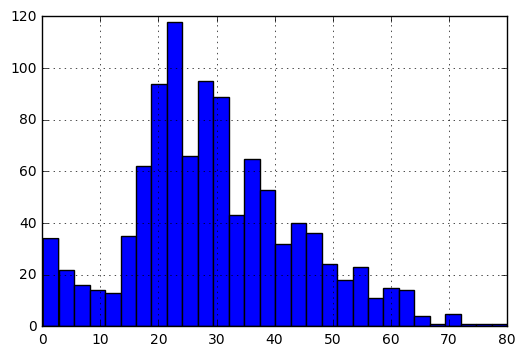

In [22]:
%matplotlib inline
titanic['age'].hist(bins=30)

Parece que podemos tambien crear variables discretas observando el histograma, donde vemos que para valores entre 0 y 15 la frecuencia es la misma, idem para entre 

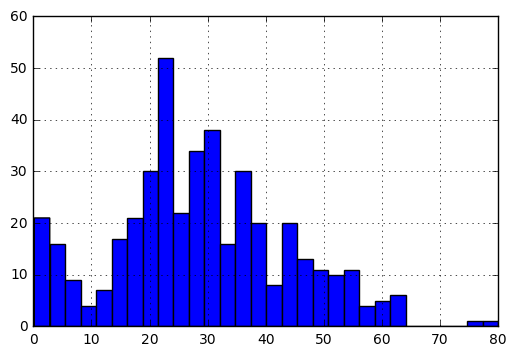

In [23]:
var_target = titanic['survived'] == 1
titanic['age'][var_target].hist(bins=30)

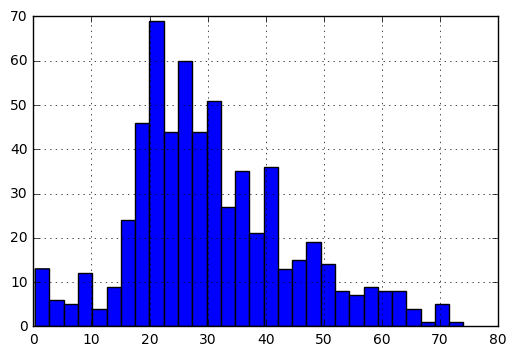

In [24]:
var_target = titanic['survived'] == 0
titanic['age'][var_target].hist(bins=30)

Vemos que hay como tres tramos, para discretizar la variable. Entre 0 y 17, entre 18 y 40 y a partir de 40. De esa manera creamos una variable discreta de tres valores 

In [25]:
titanic.loc[:, 'age_N'] = titanic['age'].map(lambda x: 'n0' if x < 17 else 'n1' if x < 40 else 'n2')

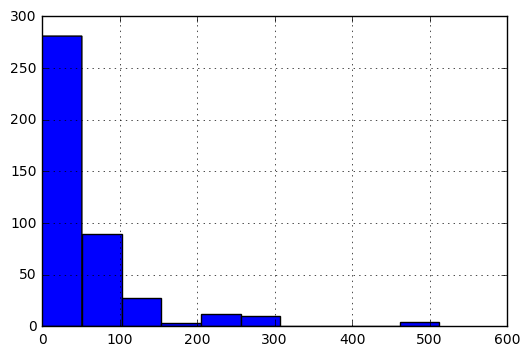

In [26]:
var_target = titanic['survived'] == 1
titanic['fare'][var_target].hist(bins=10)

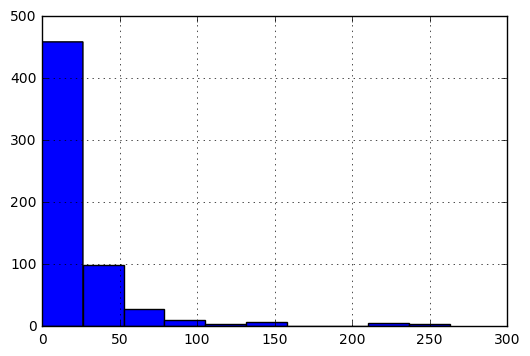

In [27]:
var_target = titanic['survived'] == 0
titanic['fare'][var_target].hist(bins=10)

In [28]:
titanic.loc[:, 'fare_N'] = titanic['fare'].map(lambda x: 'n0' if x < 25 else 'n1' if x < 100 else 'n2')

In [29]:
var_categoricas = ['sibsp_N','parch_N','pclass','sex','embarked','age_N','fare_N']
var_continuas = []
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,sibsp_N,parch_N,age_N,fare_N
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO",n1,0,n1,n2
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",n0,n0,n0,n2
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",n0,n0,n0,n2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",n0,n0,n1,n2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",n0,n0,n1,n2


## 3.3 Obtencion del VIF

Obtenemos una regresion lineal de cada una de las variables respecto al resto excluyendo la que se quiere predecir para luego obtener el valor del VIF

Creamos dummies ya que las variables que tenemos son discretizadas

In [58]:
var_categoricas = ['sibsp_N','parch_N','pclass','sex','embarked','age_N','fare_N']
var_descartadas = ['name','cabin','home.dest','ticket']
temp = titanic[['sibsp_N','parch_N','pclass','sex','embarked','age_N','fare_N','survived']]
titanic_dummie = temp.copy()
for column in var_categoricas:
    dummie = pd.get_dummies(titanic_dummie[column], prefix = column)
    names = list(dummie.columns)
    names.remove(names[0])
    titanic_dummie = pd.concat([titanic_dummie, dummie[names]], axis = 1)
    names = list(titanic_dummie.columns)
    names.remove(column)
    titanic_dummie = titanic_dummie[names]
    
titanic_dummie.head(5)

,survived,sibsp_N_n0,sibsp_N_n1,parch_N_n0,parch_N_n1,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,age_N_n1,age_N_n2,fare_N_n1,fare_N_n2
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [60]:
from sklearn.linear_model import LinearRegression

# Borrado de la variable objetivo
titanic_vif = titanic_dummie
features = list(titanic_vif.columns)
features.remove('survived')
titanic_vif = titanic_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = titanic_vif[fet]
    y = titanic_vif[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print 'El valor del VIF para la variable', var, 'es:', vif

El valor del VIF para la variable sibsp_N_n0 es: 12.7321473029
El valor del VIF para la variable sibsp_N_n1 es: 13.6207750327
El valor del VIF para la variable parch_N_n0 es: 1.58160836241
El valor del VIF para la variable parch_N_n1 es: 1.14954313242
El valor del VIF para la variable pclass_2 es: 2.89320645765
El valor del VIF para la variable pclass_3 es: 5.18126269613
El valor del VIF para la variable sex_male es: 1.11733845088
El valor del VIF para la variable embarked_Q es: 1.31259632311
El valor del VIF para la variable embarked_S es: 1.40800000251
El valor del VIF para la variable age_N_n1 es: 3.15121044175
El valor del VIF para la variable age_N_n2 es: 3.15412165843
El valor del VIF para la variable fare_N_n1 es: 2.99333691278
El valor del VIF para la variable fare_N_n2 es: 2.38673870523


Como hay dos variables que superan el valor de 5, las eliminamos y volvermos a ejecutar el VIF.

In [68]:
# Borrado de las variables cuyo VIF es mayor de 5
titanic_vif = titanic_dummie
features = list(titanic_vif.columns)
features.remove('sibsp_N_n0')
features.remove('sibsp_N_n1')
features.remove('survived')
titanic_vif = titanic_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = titanic_vif[fet]
    y = titanic_vif[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print 'El valor del VIF para la variable', var, 'es:', vif

El valor del VIF para la variable parch_N_n0 es: 1.53256610626
El valor del VIF para la variable parch_N_n1 es: 1.13212475195
El valor del VIF para la variable pclass_2 es: 2.82748435135
El valor del VIF para la variable pclass_3 es: 4.8712785471
El valor del VIF para la variable sex_male es: 1.10667452868
El valor del VIF para la variable embarked_Q es: 1.28408797895
El valor del VIF para la variable embarked_S es: 1.40227086809
El valor del VIF para la variable age_N_n1 es: 3.03929674931
El valor del VIF para la variable age_N_n2 es: 3.06494021241
El valor del VIF para la variable fare_N_n1 es: 2.61726284399
El valor del VIF para la variable fare_N_n2 es: 2.28116908258


Hemos eliminado todas las variables colineales con el modelo

## 4. Revision del Information Value

Vamos a revisar cuales son aquellas variables que aportan mas al modelo.

In [53]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Desarrollo\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [54]:
from sklearn.linear_model.logistic import LogisticRegression

#var_categoricas = ['sibsp_N','parch_N','pclass','sex','embarked','age_N','fare_N']
var_categoricas = ['sibsp','parch','pclass','sex','embarked']
#var_descartadas = ['name','cabin','home.dest','ticket']

titanic_IV = titanic[['survived','sibsp','parch','pclass','sex','embarked']]
var_target = titanic_IV['survived'] == 0

result_IV = []

for v_cat in var_categoricas:
    var_target = array(var_target)
    var_values = array(titanic[v_cat])
    var_levels = unique(var_values)

    mat_values = numpy.zeros(shape=(len(var_levels),2))

    for i in range(len(var_target)):
        # Obtención de la posición en los niveles del valor
        for j in range(len(var_levels)):
            if var_levels[j] == var_values[i]:
                pos = j
                break

        # Estimación del número valores en cada nivel
        if var_target[i]:
            mat_values[pos][0] += 1
        else:
            mat_values[pos][1] += 1

        # Obtención del IV
        IV = 0
        for j in range(len(var_levels)):
            if mat_values[j][0] > 0 and mat_values[j][1] > 0:
                rt = mat_values[j][0] / (mat_values[j][0] + mat_values[j][1])
                rf = mat_values[j][1] / (mat_values[j][0] + mat_values[j][1])
                IV += (rt - rf) * np.log(rt / rf)
        
    # Se agrega el IV al listado
    result_IV.append(IV)

for i in range(len(var_categoricas)):
    print "La variable", var_categoricas[i], "el IV es", result_IV[i]

La variable sibsp el IV es 1.63225361139
La variable parch el IV es 2.32032070406
La variable pclass el IV es 0.67613129015
La variable sex el IV es 1.35855179749
La variable embarked el IV es 0.791228338157


C:\Desarrollo\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


Seleccionamos aquellas varibales con IV por encima del valor de 0,5 que básicamente son todas, por lo que no descartamos ninguna para el modelo. Aplicamos por tanto, el dataset con dummies que obtenuvimos en la parte del VIF para la regresion logistica. 

## 5. Ejecución de la regresión logística

In [55]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
import pandas as pd

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print "La matriz de confusión es "
    print confusion_matrix

    print 'Precisión:', accuracy_score(y_true, y_pred)
    print 'Exactitud:', precision_score(y_true, y_pred)
    print 'Exhaustividad:', recall_score(y_true, y_pred)
    print 'F1:', f1_score(y_true, y_pred)

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print 'AUC:', auc(false_positive_rate, recall)

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)

In [74]:
features = ['survived', 'parch_N_n0', 'parch_N_n1','pclass_2', 'pclass_3', 'sex_male', 'embarked_Q', 'embarked_S',
       'age_N_n1', 'age_N_n2', 'fare_N_n1', 'fare_N_n2']
titanic_vif = titanic_dummie[features]
titanic_vif.head(5)

,survived,parch_N_n0,parch_N_n1,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,age_N_n1,age_N_n2,fare_N_n1,fare_N_n2
0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


La matriz de confusión es 
[[321  49]
 [ 75 182]]
Precisión: 0.802232854864
Exactitud: 0.787878787879
Exhaustividad: 0.708171206226
F1: 0.745901639344
AUC: 0.787869386897


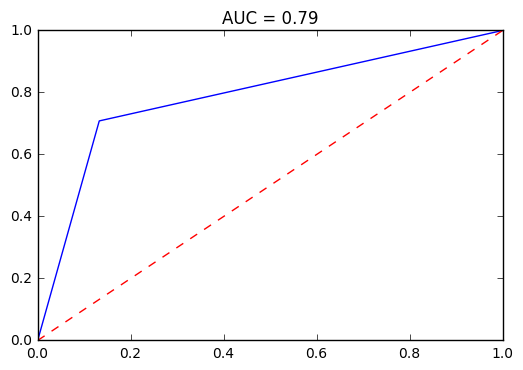

In [75]:
features = ['parch_N_n0', 'parch_N_n1','pclass_2', 'pclass_3', 'sex_male', 'embarked_Q', 'embarked_S',
       'age_N_n1', 'age_N_n2', 'fare_N_n1', 'fare_N_n2']

X_train, X_test, y_train, y_test = train_test_split(titanic_vif[features], titanic_vif['survived'], test_size=0.4)

classifier = LogisticRegression().fit(X_train, y_train)
y_pred     = classifier.predict(X_train)

metricas_modelos(y_train, y_pred)

    Probamos ahora con los valores de Test, para ver el ajuste en el conjunto de datos de Test

La matriz de confusión es 
[[216  32]
 [ 58 112]]
Precisión: 0.784688995215
Exactitud: 0.777777777778
Exhaustividad: 0.658823529412
F1: 0.713375796178
AUC: 0.764895635674


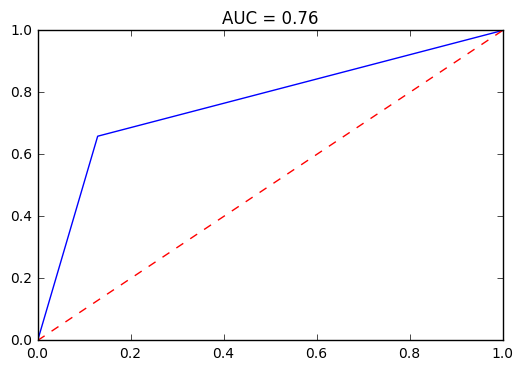

In [76]:
y_pred     = classifier.predict(X_test)

metricas_modelos(y_test, y_pred)

Vemos que el modelo para el conjunto de test (60% de los datos) es menor y está por debajo del de entrenamiento, con lo cual el modelo no sobreajusta

Veamos la matriz de confusión y los coeficientes para ver como aporta cada una de las variables al modelo

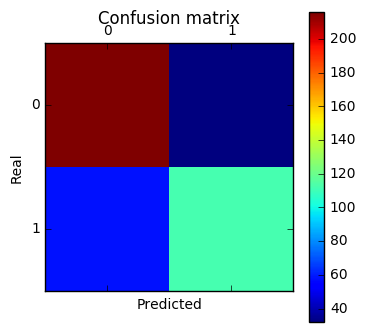

In [78]:
cm = confusion_matrix(y_test, y_pred) #SE INTRODUCEN LOS VALORES DE Y VERDADEROS, Y LOS PREDICHOS.
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Real')
plt.xlabel('Predicted')
plt.show()

In [81]:
print 'R2 en entrenamiento es: ', classifier.score(X_train, y_train)
print 'R2 en validación es: ', classifier.score(X_test, y_test)

R2 en entrenamiento es:  0.802232854864
R2 en validación es:  0.784688995215


In [83]:
classifier.coef_

array([[ 0.35722215, -1.20736111, -0.74122957, -1.61202665, -2.32612345,
        -0.83636658, -0.35784849, -0.49741482, -0.78612978,  0.23093559,
         0.0605792 ]])

In [85]:
titanic_vif[features].columns

Index([u'parch_N_n0', u'parch_N_n1', u'pclass_2', u'pclass_3', u'sex_male',
       u'embarked_Q', u'embarked_S', u'age_N_n1', u'age_N_n2', u'fare_N_n1',
       u'fare_N_n2'],
      dtype='object')

Podemos interpretar con los coeficientes, que el viejar en una determinada clase y el sexo son las variables mas influyentes a la hora de salvarse